ES FATTO IN AULA CON RAVERI

camb è la libreria per fare i conti,è detto einstein boltzmann solver, risolve einstein e da le predizioni sulle costanti cosmologiche. Ha un ottimo tutorial (camb python notebook). li dentro c'è angular diameter distance, che oggi mi serve

In [4]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)

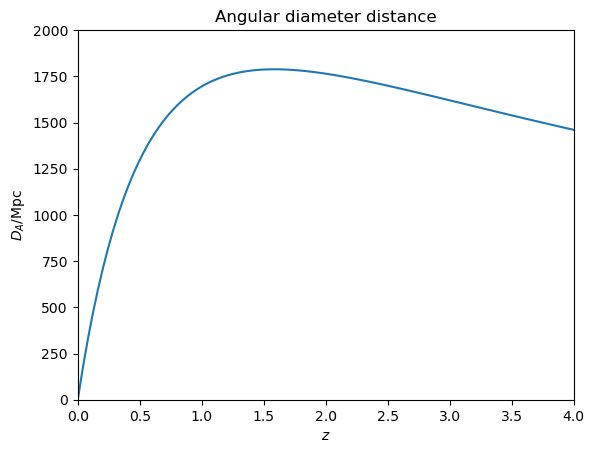

In [7]:
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
plt.plot(z, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000])
plt.xlim([0,4]);

In [ ]:
ma io voglio luminosity distance

In [21]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
z=np.linspace(0,4,100)
mu=5*np.log10(results.luminosity_distance(z))

/tmp/ipykernel_8706/2563232890.py:5: RuntimeWarning: divide by zero encountered in log10
  mu=5*np.log10(results.luminosity_distance(z))


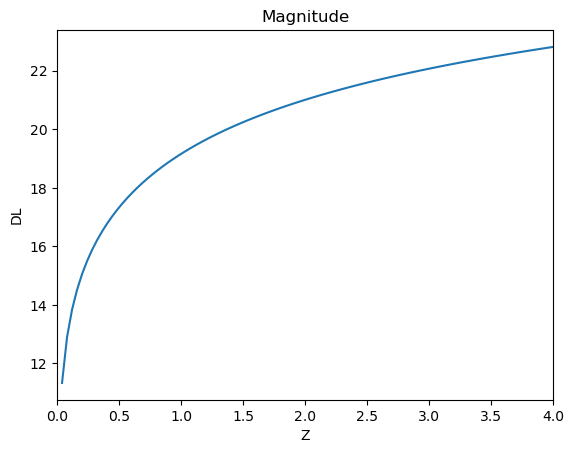

In [13]:
plt.plot(z, mu)
plt.xlabel("Z")
plt.ylabel("DL")
plt.title("Magnitude")
plt.xlim([0,4]);

In [22]:
data = np.loadtxt("fit_exercise_data.txt")

obs_z = data[:,0]
obs_mu= data[:,1]

covariance= np.loadtxt("fit_exercise_covariance.txt")

#loglike

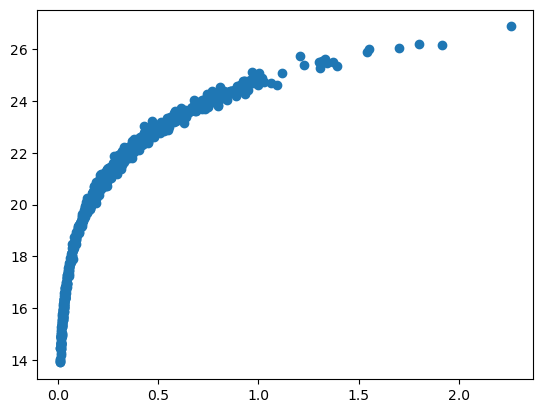

In [23]:
plt.plot(data[:,0], data[:,1],'o')

voglio capire come è matrice di correlazione, uso npcorrcoef e poi lo plotto

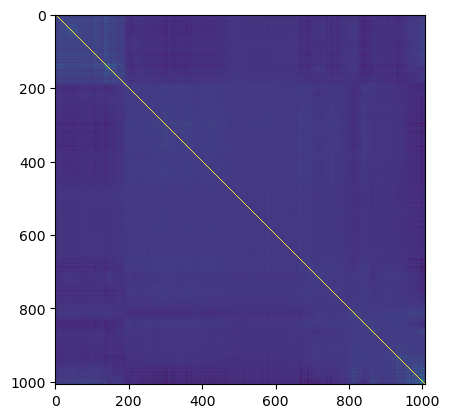

In [24]:
correlation=np.corrcoef(covariance)
plt.imshow(correlation, interpolation='nearest') #

ora voglio scrivere la likelihood, uso la log perchè se sono lontana da modello decade esponenzialmente ed è orribile. Formula 3 del foglio dato è la loglike con normalizzazione. Poi marginalizzo su ampiezza poichè costante additiva per supernoave è cambio luminosità intrinseca. Trovo formula 5. eps è matrice da invertire

In [ ]:
inv_cov=np.linalg.inv(covariance) #posso vedere quanto tempo ci mette a eseguire con timeit davanti a tutto 

In [48]:
def likelihood(omegam ):
    pars = camb.CAMBparams()
    H0=70.
    h=H0/100.
    pars.set_cosmology(H0=H0, ombh2=omegam*h**2*0.15, omch2=omegam*h**2*0.85) #omegabarioni=omegabh, omegach2=omega cold dark materr
    results = camb.get_background(pars)
    z=np.linspace(0.01,4,100)
    mu=5*np.log10(results.luminosity_distance(obs_z))
    #ora calcolo i residui necessari per loglikelihood
    residuals=mu- obs_mu
    like=-0.5*np.dot(residuals,np.dot(inv_cov, residuals)) #npdot=prodotto tra tensori, prodotto tra due vettori mi da un numero in questo caso
    ones=np.ones_like(residuals) #crea tensore di 1 della stessa forma di quello che do in imput
    temp_1=np.dot(ones,np.dot(inv_cov,residuals))
    temp_2=np.dot(np.dot(ones,inv_cov),ones)
    like +=0.5*temp_1**2/temp_2 
    return like

In [ ]:
ones.shape,residuals.shape, inv_cov.shape #per vedere come è fatto il tensore di uni

((1007,), (1007,), (1007, 1007))

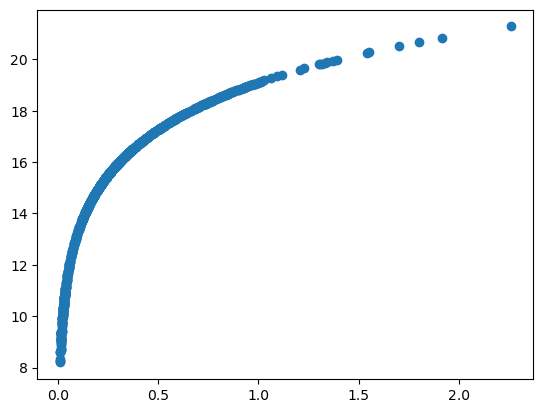

In [39]:
plt.plot(obs_z, mu, 'o')

In [51]:
omegam_grid=np.linspace(0.1,0.9,1000)
likelihoods=np.array([likelihood(omegam)for omegam in omegam_grid])
likelihoods=likelihoods-np.max(likelihoods)

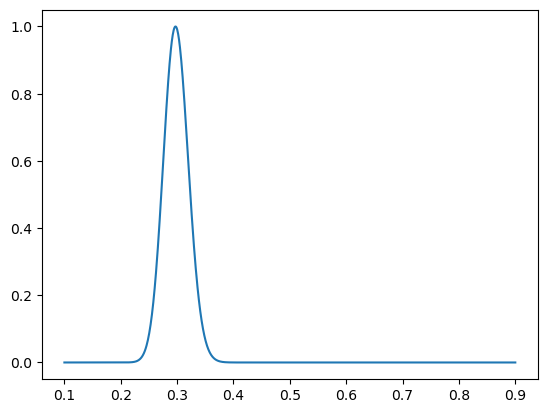

In [52]:
plt.plot(omegam_grid, np.exp(likelihoods))


In [ ]:
ho scoperto l'energia oscura!!!!! con 1000 punti ci mette un sacco (2 minuti e 10)
all'inizio fatto con 100, ma non bello(l'energia oscura l'hanno scoperta con 50 Supernovae )

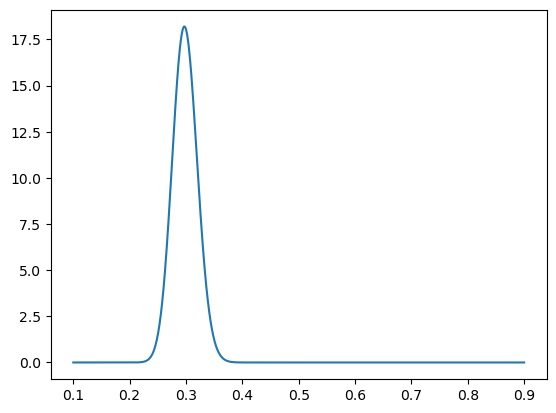

In [55]:
#così integra a 1 e posso se voglio fare media, varianza e tutti i momenti
norm= np.trapezoid(np.exp(likelihoods), omegam_grid)#integra con trapezio
posterior=np.exp(likelihoods)/norm
plt.plot(omegam_grid,posterior)
